Bank Churning
==============

Imports

In [90]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

TF Version

In [91]:
tf.__version__

'2.7.0'

Data Preprocessing
-------------------

Import the Data

In [92]:
data = pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Remove Useless Columns

In [93]:
clean = data.drop(columns = ['RowNumber','CustomerId', 'Surname' ])
clean

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Normalize CreditScore, Age, Balance, EstimatedSalary

In [94]:
# from sklearn.preprocessing import MinMaxScaler

# clean['CreditScore'] = MinMaxScaler().fit_transform(np.array(clean['CreditScore']).reshape(-1,1))
# clean['Age'] = MinMaxScaler().fit_transform(np.array(clean['Age']).reshape(-1,1))
# clean['Balance'] = MinMaxScaler().fit_transform(np.array(clean['Balance']).reshape(-1,1))
# clean['EstimatedSalary'] = MinMaxScaler().fit_transform(np.array(clean['EstimatedSalary']).reshape(-1,1))


In [95]:
x = clean.iloc[:-1, :-1].values
y = clean.iloc[:-1, -1].values

Encode Gender Column

In [96]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
x[:,2] = l.fit_transform(x[:,2])

One-Hot Encode Geography Column

In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))



Split Data into Training and Test Set

In [99]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, shuffle = True)

Feature Scaling

In [100]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

Build ANN
----------------------------------------------------------------

In [101]:
#init ANN
ann = tf.keras.models.Sequential()

#input layer
ann.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))

#hidden layers
ann.add(tf.keras.layers.Dense(units = 4, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 12, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))


#output layer
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

Training ANN
----------------------------------------------------------------

Compile ANN

In [102]:
ann.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate = 0.0001), 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

Fit Model on the Churning Data

In [103]:
model = ann.fit(
    x_train, y_train, 
    batch_size = 32, 
    epochs= 600,
    validation_data = (x_test, y_test)
    )


Epoch 1/600
250/250 [==============================] - 2s 8ms/step - loss: 0.6225 - accuracy: 0.7933 - val_loss: 0.5857 - val_accuracy: 0.8005
Epoch 2/600
250/250 [==============================] - 2s 6ms/step - loss: 0.5522 - accuracy: 0.7952 - val_loss: 0.5186 - val_accuracy: 0.8005
Epoch 3/600
250/250 [==============================] - 2s 6ms/step - loss: 0.5020 - accuracy: 0.7952 - val_loss: 0.4839 - val_accuracy: 0.8005
Epoch 4/600
250/250 [==============================] - 1s 6ms/step - loss: 0.4786 - accuracy: 0.7952 - val_loss: 0.4695 - val_accuracy: 0.8005
Epoch 5/600
250/250 [==============================] - 1s 6ms/step - loss: 0.4662 - accuracy: 0.7952 - val_loss: 0.4612 - val_accuracy: 0.8005
Epoch 6/600
250/250 [==============================] - 1s 6ms/step - loss: 0.4575 - accuracy: 0.7952 - val_loss: 0.4554 - val_accuracy: 0.8005
Epoch 7/600
250/250 [==============================] - 1s 6ms/step - loss: 0.4505 - accuracy: 0.7952 - val_loss: 0.4510 - val_accuracy: 0.8005

Evaluate Accuracy

In [ ]:
scores = ann.evaluate(x_test, y_test, verbose = 0)
print("Accuracy : %2f%%" % (scores[1]*100))

Accuracy : 86.300004%


Plot Model Performance

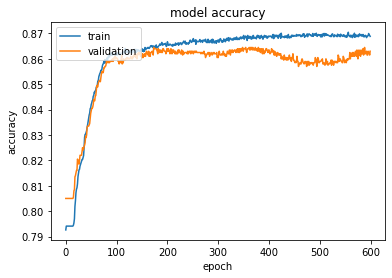

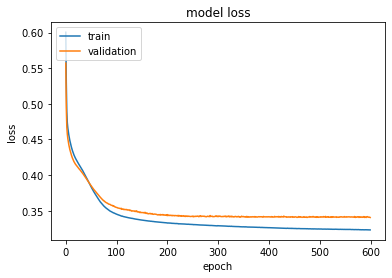

In [ ]:
#model accuracy 
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#model loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Predictions
----------------------------------------------------------------

Predict if the following customer will leave the bank:

- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40
- Tenure: 3 
- Balance: 60000
- Num of Products: 2
- Has Credit Card: Yes
- Active Member: Yes
- Est Salary: 50000


In [84]:
pred = [1.0, 0.0, 1.0 ,600,1,40,3,60000,2,1,1,50000]

ann.predict(ss.transform([pred])) > 0.5

ValueError: X has 13 features, but StandardScaler is expecting 12 features as input.